## Assignment 2   
### Name: Mengheng    
### NetID: mx586

In [9]:
%matplotlib inline
import pandas_datareader as web
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import math as m
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### 2.6 : Solve for the constants in the ACF using the known initial conditions and plot the fist 8 values.

### a)
$\rho(h)=(1+0.2195h)(-1.25)^{-h}$


[1,
 -0.9756,
 0.92096,
 -0.849152,
 0.7692288,
 -0.6873088,
 0.607387648,
 -0.5319426048,
 0.46238007296000005,
 -0.39936484966400004]

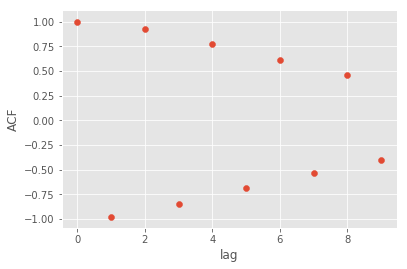

In [3]:
def CAL_a(h):
    rho=[]
    rho.append(1)
    rho.append(-0.9756)
    for i in range(2,h):
        rho.append((1+0.2195*i)*(-1.25)**(-i))
    x=np.arange(len(rho))
    plt.scatter(x,rho)
    plt.xlabel('lag')
    plt.ylabel('ACF')
    return rho

CAL_a(10)   

### b) 
$\rho(h)=0.8766*1.11^{-h}+0.1234*(-2)^{-h}$

[1,
 0.7273,
 0.7423182249817384,
 0.6255373648484129,
 0.5851560719355071,
 0.5163631841761325,
 0.47059428191543456,
 0.42125770048687805,
 0.38086199790484504,
 0.3424436390190045]

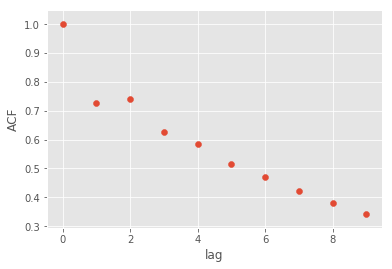

In [4]:
def CAL_b(h):
    rho=[]
    rho.append(1)
    rho.append(0.7273)
    for i in range(2,h):
        rho.append(0.8766*(1.11**(-i))+0.1234*((-2)**(-i)))#rho.append(0.8766*(1.11**(-i))+0.1234*((-2)**(-i)))
    x=np.arange(len(rho))
    plt.scatter(x,rho)
    plt.xlabel('lag')
    plt.ylabel('ACF')
    return rho

CAL_b(10)   

### c) 
$\rho(h)= (0.922)^{h}(cos(0.862*h)+0.07sin(0.862*h))$

[1,
 0.649,
 -0.07091821674762992,
 -0.636949842309974,
 -0.704242775102657,
 -0.3038398765379022,
 0.23396731246620772,
 0.5391197659279704,
 0.44821216485598836,
 0.07969079270974828]

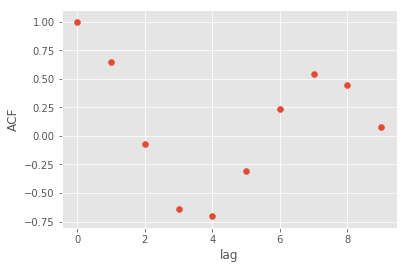

In [5]:
def CAL_c(h):
    rho=[]
    rho.append(1)
    rho.append(0.649)
    for i in range(2,h):
        rho.append((0.922)**(i)*(m.cos(0.862*i)+0.07*m.sin(0.862*i)))  
    x=np.arange(len(rho))
    plt.scatter(x,rho)
    plt.xlabel('lag')
    plt.ylabel('ACF')
    return rho        
CAL_c(10) 

### 2.7 Plot the ACF of the 3 series on the same graph for φ= 0.6, θ = 0.9 and comment of the diagnostic capabilities of the ACF in this case.   

ARMA(1,1) $X_{t} = 0.6 X_{t-1} + W_{t} + 0.9 W_{t-1}$  
ARMA(1,0) $X_{t} = 0.6 X_{t-1} + W_{t}$  
ARMA(0,1) $X_{t} = W_{t} + 0.9 W_{t-1}$  

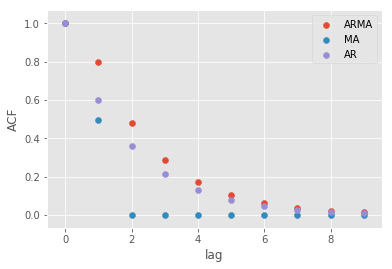

In [12]:
def Cal_ACF(phi,theta,n):
    rho=[]
    rho.append(1)
    rho.append(((phi+theta)*(1+phi*theta))/(1+2*phi*theta+theta**2))
    for i in range(2,n):
        rho.append((phi**(i-1)*(phi+theta)*(1+phi*theta))/(1+2*phi*theta+theta**2))
    return rho
y_ARMA=Cal_ACF(0.6,0.9,10)
y_MA=Cal_ACF(0,0.9,10)
y_AR=Cal_ACF(0.6,0,10)
x=np.arange(len(y_ARMA))
plt.scatter(x,y_ARMA,label='ARMA')
plt.scatter(x,y_MA,label='MA')
plt.scatter(x,y_AR,label='AR')
plt.xlabel('lag')
plt.ylabel('ACF')
plt.legend()

+ We can see that for MA, the ACF become 0 after $h >=2$, while ACF of ARMA and AR are not 0 yet.